#  <span style="text-decoration:underline;">Assignment 2</span>: Clustering Yelp Data

## Introduction 

In this assignment, we will be working with the [Yelp data set](http://cs-people.bu.edu/bahargam/506/yelp_dataset_challenge_academic_dataset.tar). You can find information about the format of the data set [here](https://www.yelp.com/dataset_challenge).

## Submission 

Please use the following invitation link to create your assignment repository for this assignment: [https://classroom.github.com/a/nowbCi7s](https://classroom.github.com/a/nowbCi7s). Include your BU username within your submission by adding it here: **<minzhou@bu.edu&gt;**.

Do not delete the output of your code cells. This assignment must be completed **individually** by each student.

## <span style="text-decoration:underline;">Problem 1</span>: Clustering, Scaling, and Visualizing

**<span style="text-decoration:underline;">Part A</span> (35 points):** From the Business Objects data set (`yelp_academic_dataset_business.json`), we want to find culinary districts in Las Vegas. These districts are characterized by the physical proximity and similarity of restaurants. We can use `longitude` and `latitude` to cluster for proximity, and `categories` to cluster for similarity. Only a subset (the top 15) of the most popular categories should be used.

Note that the spatial coordinates and restaurant categories have different units of scale. Your results could be arbitrarily skewed if you don't incorporate some scaling.

Find clusters using $k$-means++ (you are permitted to use the implementation available in scikit-learn). Explain your data representation and how you determined the number of clusters in $k$-means++.

**<span style="text-decoration:underline;">Part B</span> (15 points):** Visualize the clusters by plotting the longitude/latitude of the restaurants in a scatter plot. Label each cluster with a category. In a markdown, explain how labels are assigned.

Note that some categories are inherently more common (e.g., "pizza"). When labeling your clusters, you want to avoid the scenario where all clusters are labeled as "pizza" simply because of the uniformly large number of these restaurants across all clusters. In other words, we don’t want to point out that pizza restaurants are pretty much evenly distributed in high quantities everywhere, but rather discover when they, or another type of restaurant, appear in notably high quantities.

## Solution:

### Part A

### 1. Find the top 15 most popular restaurant in Las Vegas

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

In [2]:
current_path = os.getcwd()
data_set_folder = 'yelp_dataset_challenge_academic_dataset'
business_data_path = os.path.join(current_path, data_set_folder, 'yelp_academic_dataset_business.json')
print(business_data_path)

/Users/minzhou/Desktop/CS506/cs506-f18-a2-minzhou1003/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json


In [3]:
df = pd.read_json(business_data_path, lines=True)
df_las_vegas = df[(df.city == 'Las Vegas')]
business_df = df_las_vegas[['business_id', 'categories', 'latitude', 'longitude']]
categories = [''.join(cat).replace('(', '').replace(')', '').replace(' ', '') for cat in business_df['categories']]
categories_df = pd.DataFrame(categories, columns=['category'])
restaurant_df = categories_df[categories_df.category.str.contains('Restaurant')]
count_categories = restaurant_df.category.value_counts()

In [4]:
count_categories = count_categories.sort_values(ascending=False)
top_categories = count_categories.iloc[:15]
print("Top 15 restaurant categories:")
top_categories

Top 15 restaurant categories:


MexicanRestaurants                337
PizzaRestaurants                  245
ChineseRestaurants                177
BurgersFastFoodRestaurants        157
FastFoodRestaurants               109
FastFoodSandwichesRestaurants     109
AmericanTraditionalRestaurants    107
SandwichesRestaurants             101
RestaurantsItalian                 95
AmericanNewRestaurants             83
FastFoodMexicanRestaurants         83
SushiBarsJapaneseRestaurants       82
ThaiRestaurants                    69
JapaneseRestaurants                61
SteakhousesRestaurants             60
Name: category, dtype: int64

In [5]:
top_categories_list = top_categories.index.tolist()

In [6]:
business_df = business_df.assign(category=categories_df.values)
top_business_df = business_df[business_df.category.isin(top_categories_list)]
top_business_df = top_business_df.drop(['categories'], axis=1)
top_business_df

,business_id,latitude,longitude,category
8290,AgtFQVxo-PGQVsOdY6Nvdg,35.999205,-115.107474,PizzaRestaurants
8488,AFDFOs2GaIyUArGyEUDQzQ,36.125908,-115.197904,ChineseRestaurants
8503,R5e2XWtpa_CA77MIXEyCTg,36.130335,-115.206002,FastFoodSandwichesRestaurants
8508,pCobXgTy6DIfBaT4pjlq0w,36.143326,-115.206316,SandwichesRestaurants
8520,V8id7mkt3nJYOD_HthEn1w,36.145191,-115.192593,ChineseRestaurants
8523,9-O8qKGQQCYXdBlj4iv7bw,36.144676,-115.175041,RestaurantsItalian
8533,A2aVN_Yw3xDz4x7gGtmYog,36.146282,-115.190504,MexicanRestaurants
8553,N2tjtB2hb0rrEQM9503qEg,36.149789,-115.207595,FastFoodSandwichesRestaurants
8559,pNqHRWlrbh71zbPZNd7_2g,36.126613,-115.207050,ChineseRestaurants
8567,idvjjh3yCDu7Hupzl89iQw,36.144081,-115.194348,FastFoodRestaurants


### 2. Prepare the feature vector
### 2.1 Convert category to vectors using TfidfVectorizer

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(top_categories_list)
print(len(top_categories_list))
vocabulary = sorted(vectorizer.vocabulary_.items(), key=lambda kv: kv[1])
category_vec = vectorizer.transform(top_business_df.category).toarray()

print(category_vec.shape)
print(category_vec)

15
(1875, 15)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [64]:
vocabulary

[('americannewrestaurants', 0),
 ('americantraditionalrestaurants', 1),
 ('burgersfastfoodrestaurants', 2),
 ('chineserestaurants', 3),
 ('fastfoodmexicanrestaurants', 4),
 ('fastfoodrestaurants', 5),
 ('fastfoodsandwichesrestaurants', 6),
 ('japaneserestaurants', 7),
 ('mexicanrestaurants', 8),
 ('pizzarestaurants', 9),
 ('restaurantsitalian', 10),
 ('sandwichesrestaurants', 11),
 ('steakhousesrestaurants', 12),
 ('sushibarsjapaneserestaurants', 13),
 ('thairestaurants', 14)]

### 2.2 Put weights to the categories vector

The weights are calculated by the number of counts of each category. For example, if there are 337 Mexican Restaurants, then the weights for it is 337/total number of restaurants.

In [65]:
cnt = top_categories.to_dict()
weights = {k: v / total for total in (sum(cnt.values()),) for k, v in cnt.items()}
weights =  {k.lower(): v for k, v in weights.items()}
weights

{'mexicanrestaurants': 0.17973333333333333,
 'pizzarestaurants': 0.13066666666666665,
 'chineserestaurants': 0.0944,
 'burgersfastfoodrestaurants': 0.08373333333333334,
 'fastfoodrestaurants': 0.058133333333333335,
 'fastfoodsandwichesrestaurants': 0.058133333333333335,
 'americantraditionalrestaurants': 0.05706666666666667,
 'sandwichesrestaurants': 0.05386666666666667,
 'restaurantsitalian': 0.050666666666666665,
 'americannewrestaurants': 0.04426666666666667,
 'fastfoodmexicanrestaurants': 0.04426666666666667,
 'sushibarsjapaneserestaurants': 0.04373333333333333,
 'thairestaurants': 0.0368,
 'japaneserestaurants': 0.03253333333333333,
 'steakhousesrestaurants': 0.032}

In [66]:
weight_array = []
for item in vocabulary:
    weight_array.append(weights[item[0]])
weight_array = np.asarray(weight_array)

In [67]:
category_vec = category_vec*weight_array
print(f'The category feature vector shape: {category_vec.shape}')

The category feature vector shape: (1875, 15)


In [68]:
latitude_vec = top_business_df.latitude.values.reshape(-1, 1)
longitude_vec = top_business_df.longitude.values.reshape(-1, 1)
X_location = np.concatenate((latitude_vec, longitude_vec), axis=1)
print(f'The location feature vector shape: {X_location.shape}')

The location feature vector shape: (1875, 2)


### 2.2 Scaling the location fearures using MinMaxScaler

In [69]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler().fit(X_location)
X_minmax = minmax_scale.transform(X_location)
X_location

array([[  35.9992047 , -115.1074743 ],
       [  36.125908  , -115.197904  ],
       [  36.130335  , -115.206002  ],
       ...,
       [  36.06025614, -115.27874554],
       [  36.143945  , -115.064099  ],
       [  36.12874469, -115.16424153]])

In [70]:
minmax_scale.inverse_transform(X_minmax)

array([[  35.9992047 , -115.1074743 ],
       [  36.125908  , -115.197904  ],
       [  36.130335  , -115.206002  ],
       ...,
       [  36.06025614, -115.27874554],
       [  36.143945  , -115.064099  ],
       [  36.12874469, -115.16424153]])

Finally, the complete feature vector is:

In [71]:
X = np.concatenate((X_minmax, category_vec), axis=1)
print(f'The complete feature vector shape: {X.shape}')

The complete feature vector shape: (1875, 17)


### 3. Determine the optimal number of clusters 

The way I determine the optimal number of clusters is using `evaluate_clusters` function and the `sc_evaluate_clusters` function from the [lecture](https://github.com/lapets/course-data-science/blob/master/lecture-2018-10-04.ipynb).

In [72]:
def evaluate_clusters(X, max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_

    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')

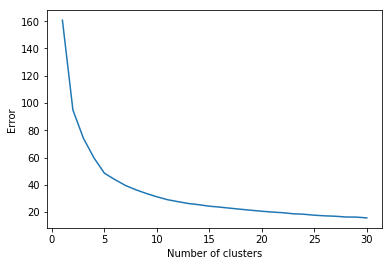

In [73]:
evaluate_clusters(X, 30)

In [74]:
def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
  

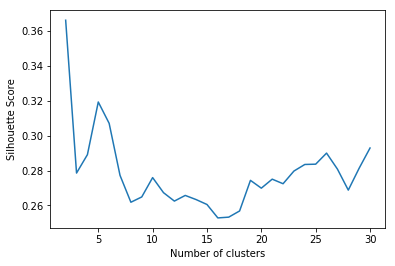

In [75]:
sc_evaluate_clusters(X,30)

From above two graphs, I decided to use K = 5

In [140]:
kmeans = KMeans(n_clusters=5,init='k-means++', n_init=10, random_state=0).fit(X)
y_problem1 = kmeans.predict(X)
y_problem1

array([3, 2, 2, ..., 4, 1, 2], dtype=int32)

### Part B

To find out the label for each cluster:
1. For each cluster, count the categories and assign them a score by occurrence rate.
2. Pick the highest rate for each categories.
3. assign highest-rate category for each cluster.

In [106]:
from collections import defaultdict, Counter

res = defaultdict(list)
for i in range(5):
    counter = Counter(np.array(vectorizer.inverse_transform(X[y_problem1==i,-15:])).flatten())
    total = sum(counter.values(), 0.0)
    for key in counter:
        counter[key] = (counter[key]/total, i)
        res[key].append(counter[key])    

In [107]:
# rate_dict {'category': (occurrence rate, cluster_id)}
rate_dict = {}
for item in res:
    rate_dict[item] = max(res[item], key=lambda x: x[0])
rate_dict

{'fastfoodmexicanrestaurants': (0.07547169811320754, 0),
 'pizzarestaurants': (0.16226415094339622, 0),
 'americantraditionalrestaurants': (0.08016877637130802, 3),
 'fastfoodrestaurants': (0.09433962264150944, 0),
 'chineserestaurants': (0.11281337047353761, 2),
 'mexicanrestaurants': (0.3079584775086505, 1),
 'thairestaurants': (0.04596100278551532, 2),
 'sushibarsjapaneserestaurants': (0.06830601092896176, 4),
 'restaurantsitalian': (0.07242339832869081, 2),
 'fastfoodsandwichesrestaurants': (0.0759493670886076, 3),
 'burgersfastfoodrestaurants': (0.11072664359861592, 1),
 'sandwichesrestaurants': (0.08438818565400844, 3),
 'japaneserestaurants': (0.04596100278551532, 2),
 'americannewrestaurants': (0.05907172995780591, 3),
 'steakhousesrestaurants': (0.06406685236768803, 2)}

In [108]:
top_restaurant = sorted(rate_dict,key=lambda k: rate_dict[k][0], reverse=True)

In [109]:
cluster_label = defaultdict(list)
print('Top restarant for each cluster: ')
for restaurant in top_restaurant:
    cluster_label[rate_dict[restaurant][1]].append(restaurant)
for cluster in cluster_label:
    print(f'Cluster {cluster}:')
    print(f'Label: {cluster_label[cluster][0]}')
    print()

Top restarant for each cluster: 
Cluster 1:
Label: mexicanrestaurants

Cluster 0:
Label: pizzarestaurants

Cluster 2:
Label: chineserestaurants

Cluster 3:
Label: sandwichesrestaurants

Cluster 4:
Label: sushibarsjapaneserestaurants



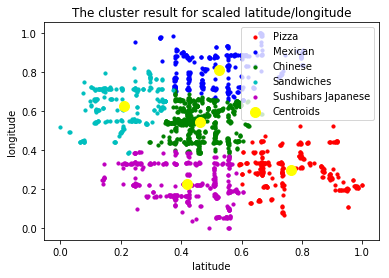

In [142]:
plt.scatter(X[y_problem1 == 0, 0], X[y_problem1 == 0, 1], s = 10, c = 'r', label = 'Pizza')
plt.scatter(X[y_problem1 == 1, 0], X[y_problem1 == 1, 1], s = 10, c = 'b', label = 'Mexican')
plt.scatter(X[y_problem1 == 2, 0], X[y_problem1 == 2, 1], s = 10, c = 'g', label = 'Chinese')
plt.scatter(X[y_problem1 == 3, 0], X[y_problem1 == 3, 1], s = 10, c = 'c', label = 'Sandwiches')
plt.scatter(X[y_problem1 == 4, 0], X[y_problem1 == 4, 1], s = 10, c = 'm', label = 'Sushibars Japanese')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('The cluster result for scaled latitude/longitude')
plt.legend()
plt.show()

## <span style="text-decoration:underline;">Problem 2</span>: Outliers and Unsupervised Clustering

**<span style="text-decoration:underline;">Part A</span> (15 points):** Detect the top five outliers for each cluster that you generated in Problem 1. These are the restaurants that are the farthest from the centroids of their clusters.

1. The idea is to calculate the euclidean distances between each point and the cluster center and find the farthest 5 points within each cluster. Meanwhile, save the scaled latitude and longitude of outliers.

In [87]:
from sklearn.metrics.pairwise import euclidean_distances

def find_outlier_location(X, y):
    outliers_location = {}
    for i in range(5):
        data = X[y == i]
        centroid = kmeans.cluster_centers_[i]
        distance = euclidean_distances(data, [centroid]).flatten()
        top_5_idx = (np.argsort(distance))[-5:][::-1]
        top_5_values = np.array([data[i] for i in top_5_idx])
        outliers_location[i] = minmax_scale.inverse_transform(top_5_values[:, :2])
    return outliers_location
outliers_location = find_outlier_location(X, y_problem1)

2. Find the business_id of each outliers by match the "latitude" value.

In [88]:
def find_outlier_business_id(outliers_location, top_business_df):
    outliers_business_id = defaultdict(list)
    for cluster in outliers_location:
        print(f'Cluster {cluster}:')
        print()
        for i in range(5):
            print(f' Outlier {i} business_id:')
            latitude = outliers_location[cluster][i][0]
            longitude = outliers_location[cluster][i][1]
            outlier_df = top_business_df[(top_business_df['latitude']==latitude)]
            outliers_business_id[cluster].append(outlier_df['business_id'].to_string())
            print(f' {outlier_df.business_id.to_string()}')
            print()
    return outliers_business_id
outliers_business_id = find_outlier_business_id(outliers_location, top_business_df)

Cluster 0:

 Outlier 0 business_id:
 41449    jSDLdzm7ZbMWL3g3D2GU9w

 Outlier 1 business_id:
 10074    uybZVwl43IwaKAeRqkb3Zg

 Outlier 2 business_id:
 51137    Klb2mXlUHuSTyN3CkgZ0EA

 Outlier 3 business_id:
 42911    WzEceFzuqAbhxhC6G0HXiQ

 Outlier 4 business_id:
 64795    J8iQeK-3yL2R0UdXJsU8zw

Cluster 1:

 Outlier 0 business_id:
 27878    zE8tWlS_MmPAIF3vTIgKDA

 Outlier 1 business_id:
 50818    hOoVmw1bS-aSvOJKenDRCA

 Outlier 2 business_id:
 17444    _SdixbXjvpCIMln7_sgDfg

 Outlier 3 business_id:
 26217    jg-d4xhw8SiqpU8xEB1jNg

 Outlier 4 business_id:
 38971    J_Z_XLjhhtTNOupOwemDqg

Cluster 2:

 Outlier 0 business_id:
 43759    1dAA6vT55o35XZT3DV4hSA

 Outlier 1 business_id:
 55720    2Y6zErXWajSN7vaJaPHcEw

 Outlier 2 business_id:
 41984    Ol2U3ingyNQENmVofvxW_Q

 Outlier 3 business_id:
 36361    EUmfOpiQxJ5yaEMypI30gQ

 Outlier 4 business_id:
 30771    l3FM8f22YKXnWjsb9rejvQ

Cluster 3:

 Outlier 0 business_id:
 69639    V971TUTl5o1cxTsIhV7h6Q

 Outlier 1 business_id:


**<span style="text-decoration:underline;">Part B</span> (35 points):** Cluster the restaurants using the text of the restaurant reviews (rather than the categories) in an unsupervised fashion. Use the document-term matrix approach and tf-idf. Finally, use one cluster comparison metric to compare your results from Problem 1 to your unsupervised clustering results from Problem 2.

#### 1. Read the yelp_academic_dataset_review.json file

In [7]:
review_data_path = os.path.join(current_path, data_set_folder, 'yelp_academic_dataset_review.json')
print(review_data_path)
df_review = pd.read_json(review_data_path, lines=True)

/Users/minzhou/Desktop/CS506/cs506-f18-a2-minzhou1003/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json


In [8]:
business_id = top_business_df['business_id']
top_restaurant_review = df_review[df_review['business_id'].isin(business_id)]

In [9]:
top_restaurant_review = top_restaurant_review[['business_id', 'text']]

#### 2. Merge two dataframe

Before merging two dataframes, join the review text for each restarurant.

In [10]:
text_dict = {}
for buss_id in business_id:
    temp_df = top_restaurant_review[top_restaurant_review['business_id'] == buss_id].text
    text_dict[buss_id] = ' '.join(temp_df)

In [26]:
review_df = pd.Series(text_dict, name='text')

In [27]:
review_df.index.name = 'business_id'
review_df = review_df.reset_index()

In [25]:
merge_result = pd.merge(top_business_df, review_df, on='business_id')
merge_result

,business_id,latitude,longitude,category,text
0,AgtFQVxo-PGQVsOdY6Nvdg,35.999205,-115.107474,PizzaRestaurants,I hadn't had Pizza Hut in years! My dad just ...
1,AFDFOs2GaIyUArGyEUDQzQ,36.125908,-115.197904,ChineseRestaurants,This place has excellent pan fried Sea Bass. ...
2,R5e2XWtpa_CA77MIXEyCTg,36.130335,-115.206002,FastFoodSandwichesRestaurants,This Subway and the company really suck. Don'...
3,pCobXgTy6DIfBaT4pjlq0w,36.143326,-115.206316,SandwichesRestaurants,love the schmears. love the new breakfast bage...
4,V8id7mkt3nJYOD_HthEn1w,36.145191,-115.192593,ChineseRestaurants,I order takeout from this particular China Joe...
5,9-O8qKGQQCYXdBlj4iv7bw,36.144676,-115.175041,RestaurantsItalian,We all have those special places we like to de...
6,A2aVN_Yw3xDz4x7gGtmYog,36.146282,-115.190504,MexicanRestaurants,This place occupies an old FARM BASKET so it l...
7,N2tjtB2hb0rrEQM9503qEg,36.149789,-115.207595,FastFoodSandwichesRestaurants,"I tried to eat here today, but they appeared u..."
8,pNqHRWlrbh71zbPZNd7_2g,36.126613,-115.207050,ChineseRestaurants,this place is located in the corner of a strip...
9,idvjjh3yCDu7Hupzl89iQw,36.144081,-115.194348,FastFoodRestaurants,this is the only stand-alone hot dog place in ...


#### 3. Generate the review text vector using TfidfVectorizer

In [28]:
# Remove all special characters and numbers
review_text_list = merge_result['text'].str.replace('[^a-zA-Z]+',' ').tolist()

In [29]:
# Remove stop words for TfidfVectorizer
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=my_stop_words, min_df=4, max_df=0.8)
vectorizer.fit(review_text_list)
vocabulary = sorted(vectorizer.vocabulary_.items(), key=lambda kv: kv[1])
review_vec = vectorizer.transform(merge_result.text).toarray()
print(f'The shape of review text vector: {review_vec.shape}')
print(review_vec)

The shape of review text vector: (1875, 24224)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.11071251 0.         0.         ... 0.         0.         0.        ]]


#### 4. Use TruncatedSVD to reduce the dimension of the review text vector to 15

In [41]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=15, n_iter=7, random_state=42)
review_vec_new = svd.fit_transform(review_vec)
print(f'The shape of review text vector after svd: {review_vec_new.shape}')

The shape of review text vector after svd: (1875, 15)


#### 5. Concatenate all feature vectors 

In [42]:
# Preprocess the latitude and longitude as problem1
latitude_vec = merge_result.latitude.values.reshape(-1, 1)
longitude_vec = merge_result.longitude.values.reshape(-1, 1)
X_location = np.concatenate((latitude_vec, longitude_vec), axis=1)
print(f'The location feature vector shape: {X_location.shape}')
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler().fit(X_location)
X_minmax = minmax_scale.transform(X_location)

The location feature vector shape: (1875, 2)


In [43]:
# Concatenate all feature vectors
X_review = np.concatenate((review_vec_new, X_minmax), axis=1)
print(f'The complete feature vector shape: {X_review.shape}')

The complete feature vector shape: (1875, 17)


#### 6. Evalute the clusters

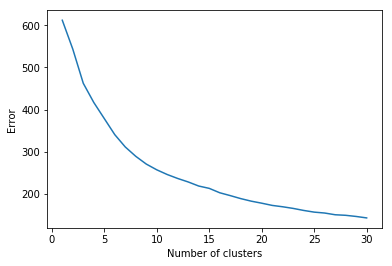

In [44]:
evaluate_clusters(X_review, 30)     

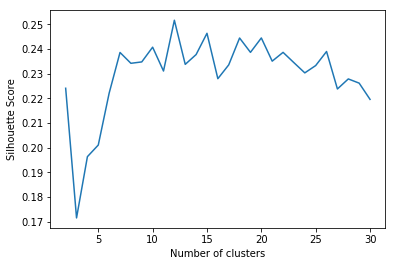

In [45]:
sc_evaluate_clusters(X_review,30)

From above two graphs, I decided to use K = 12

In [111]:
kmeans = KMeans(n_clusters=12,init='k-means++', n_init=10, random_state=0).fit(X_review)
y_problem2 = kmeans.predict(X_review)
y_problem2

array([ 2,  8, 11, ...,  1,  4,  1], dtype=int32)

#### 7. Compare results from Problem 1 and Problem 2

In [141]:
ri = metrics.adjusted_rand_score(y_problem1, y_problem2)
print(f'Adjusted Rand index score: {ri}')

Adjusted Rand index score: 0.09016553555836568


From the adjusted rand score of problem1 and problem2, the value is very low. That means two clusters' results are very different. 